In [1]:
import networkx as nx
import pandas as pd

In [2]:
ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

ts_connection

,user_id_teacher,user_id_student,teaching
0,0,40,history
1,0,96,history
2,0,118,history
3,0,144,history
4,25,40,history
...,...,...,...
233,108,3,psychology
234,108,52,psychology
235,108,90,psychology
236,108,101,psychology


In [3]:
ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

source_col = 'user_id_teacher'
target_col = 'user_id_student'
edge_col = 'teaching'

G = nx.from_pandas_edgelist(ts_connection, source=source_col, target=target_col, edge_attr=edge_col, create_using=nx.DiGraph)

In [4]:
nx.from_pandas_edgelist?

Signature:
nx.from_pandas_edgelist(
    df,
    source='source',
    target='target',
    edge_attr=None,
    create_using=None,
    edge_key=None,
)
Docstring:
Returns a graph from Pandas DataFrame containing an edge list.

The Pandas DataFrame should contain at least two columns of node names and
zero or more columns of edge attributes. Each row will be processed as one
edge instance.

Note: This function iterates over DataFrame.values, which is not
guaranteed to retain the data type across columns in the row. This is only
a problem if your row is entirely numeric and a mix of ints and floats. In
that case, all values will be returned as floats. See the
DataFrame.iterrows documentation for an example.

Parameters
----------
df : Pandas DataFrame
    An edge list representation of a graph

source : str or int
    A valid column name (string or integer) for the source nodes (for the
    directed case).

target : str or int
    A valid column name (string or integer) for the target node

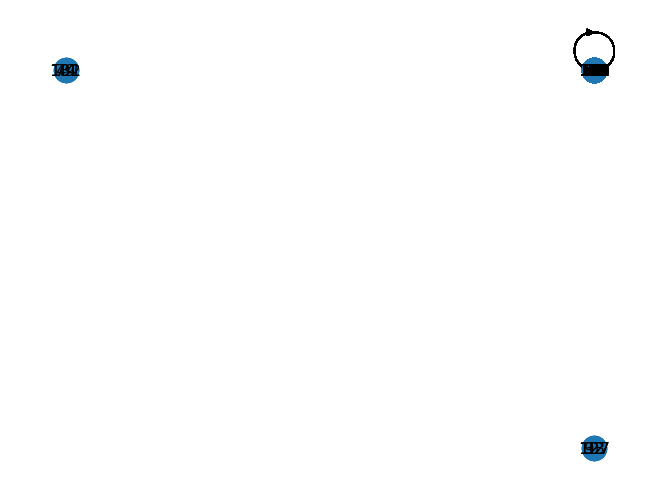

In [5]:
nx.draw_spectral(G, with_labels=True)

In [6]:
G.number_of_edges()

238

In [7]:
G.number_of_nodes()

118

In [8]:
for edge in G.edges(data=True):
    print(edge)

(0, 40, {'teaching': 'history'})
(0, 96, {'teaching': 'history'})
(0, 118, {'teaching': 'history'})
(0, 144, {'teaching': 'history'})
(40, 18, {'teaching': 'Romanian language'})
(40, 123, {'teaching': 'Romanian language'})
(118, 34, {'teaching': 'biology'})
(118, 54, {'teaching': 'biology'})
(118, 77, {'teaching': 'biology'})
(118, 138, {'teaching': 'biology'})
(25, 40, {'teaching': 'history'})
(25, 96, {'teaching': 'history'})
(25, 118, {'teaching': 'history'})
(25, 144, {'teaching': 'history'})
(68, 40, {'teaching': 'history'})
(68, 96, {'teaching': 'history'})
(68, 118, {'teaching': 'history'})
(68, 144, {'teaching': 'history'})
(138, 40, {'teaching': 'history'})
(138, 96, {'teaching': 'history'})
(138, 118, {'teaching': 'history'})
(138, 144, {'teaching': 'history'})
(140, 40, {'teaching': 'history'})
(140, 96, {'teaching': 'history'})
(140, 118, {'teaching': 'history'})
(140, 144, {'teaching': 'history'})
(143, 40, {'teaching': 'history'})
(143, 96, {'teaching': 'history'})
(143, 

In [9]:
for n in range(0, 150):
    try: 
        print(nx.find_cycle(G, source=n))
    except:
        print('No cycles')

[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
No cycles
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
No cycles
[(64, 73), (73, 43), (43, 48), (48, 64)]
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48), (48, 64), (64, 73), (73, 43)]
No cycles
No cycles
No cycles
No cycles
[(43, 48), (48, 64), (64, 73), (73, 43)]
[(43, 48),

In [10]:
print(nx.find_cycle(G, source=30))

[(43, 48), (48, 64), (64, 73), (73, 43)]


In [11]:
try: 
    nx.find_cycle(G, source=30)
except:
    print('No cycles')

In [12]:
for i, x in enumerate(nx.simple_cycles(G)):
    print(i, x)

0 [0, 40, 123]
1 [0, 118, 138, 40, 123]
2 [138, 118]
3 [48, 64, 73, 43]
